In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pymatgen as pymat
%matplotlib inline

import seaborn as sns
from sklearn import metrics, decomposition, datasets, preprocessing
from sklearn.decomposition import PCA
import warnings; warnings.simplefilter('ignore')

import numpy as np
from sklearn.preprocessing import Imputer as SimpleImputer
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

plt.rcParams['font.size'] = 24
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['axes.linewidth'] = 6.0


#File Imports
filePath = ''  # (° ͜ʖ ͡°) 
df_train = pd.read_csv(filePath + 'data/equip_failures_training_set.csv')
df_test = pd.read_csv(filePath + 'data/equip_failures_test_set.csv')

In [7]:
#clean up data 
df_train.replace('na', 'nan', inplace = True) 
df_test.replace('na', 'nan', inplace = True)

df_train1=df_train[df_train['target']==1]
df_train0=df_train[df_train['target']==0]

In [15]:
#feature list based on feature importance module
top_featuresAV=["sensor61_measure","sensor35_measure","sensor59_measure","sensor45_measure","sensor89_measure","sensor26_histogram_bin2", "sensor82_measure"]
top_featuresGB=["sensor61_measure", "sensor59_measure", "sensor62_measure", "sensor9_measure", "sensor25_histogram_bin0", "sensor35_measure","sensor25_histogram_bin1"]
top_featuresXGB=["sensor59_measure", "sensor61_measure", "sensor1_measure", "sensor69_histogram_bin2", "sensor35_measure", "sensor7_histogram_bin2", "sensor25_histogram_bin2"]
top_features=[top_featuresAV, top_featuresGB, top_featuresXGB]


Average
successful
failing
total


successful   failing     total
0    0.688616  0.536736  0.699868
1    0.142814  0.156612  0.142248
2    0.086801  0.143136  0.078954
3    0.036389  0.078424  0.034886
4    0.032636  0.055596  0.029876
5    0.009563  0.021102  0.011074
6    0.003181  0.008394  0.003094

sensor61_measure  sensor35_measure  sensor59_measure  sensor45_measure  \
0          0.395195          0.409361          0.434622          0.416014   
1         -0.010413         -0.000612         -0.016983         -0.018416   
2         -0.366460         -0.442014          0.201421          0.381292   
3          0.715074         -0.103027         -0.198829         -0.336204   
4         -0.404344          0.393340         -0.374344         -0.386736   
5          0.114026         -0.680708          0.047360         -0.250094   
6          0.146944         -0.091392         -0.767031          0.596712   

   sensor89_measure  sensor26_histogram_bin2  sensor82_measure  
0          0.414546                 0.375893          0.033704  
1         -0.017222                -0.018978          0.999303  
2         -0.352806                 0.599807          0.011672  
3         -0.401509                 0.405311         -0.001409  
4          0.262185                 0.568636         -0.002143  
5          0.669186                 0.104524          0.010485  
6          0.160068                -0.005209          0.002096

Gradient Boosting
successful
failing
total


successful   failing     total
0    0.442791  0.369962  0.460571
1    0.162527  0.235425  0.177330
2    0.142919  0.132925  0.137230
3    0.124401  0.129490  0.120579
4    0.075740  0.067292  0.053791
5    0.029857  0.043389  0.028044
6    0.021766  0.021517  0.022454

sensor61_measure  sensor59_measure  sensor62_measure  sensor9_measure  \
0          0.495048          0.479987          0.151927         0.236821   
1         -0.198853         -0.169361          0.103735        -0.315437   
2         -0.019735         -0.072424         -0.911493         0.339225   
3         -0.206191         -0.343634          0.367673         0.826953   
4         -0.032302          0.012751          0.006003        -0.032542   
5          0.689692         -0.711497         -0.001878        -0.117703   
6         -0.442450         -0.333480         -0.010687        -0.174864   

   sensor25_histogram_bin0  sensor35_measure  sensor25_histogram_bin1  
0                 0.288538          0.493756                 0.343985  
1                 0.654908         -0.287268                 0.556853  
2                 0.148756          0.008088                 0.162107  
3                 0.075668         -0.077775                 0.092688  
4                -0.677787         -0.078382                 0.729493  
5                -0.024262          0.056546                 0.021276  
6                -0.001733          0.811312                 0.064088

XGBoost
successful
failing
total


successful   failing     total
0    0.576884  0.459021  0.601888
1    0.142255  0.160246  0.130563
2    0.132363  0.137003  0.125439
3    0.086420  0.118007  0.078161
4    0.035638  0.072018  0.037969
5    0.022854  0.044915  0.022564
6    0.003585  0.008790  0.003415

sensor59_measure  sensor61_measure  sensor1_measure  \
0          0.454421          0.442139         0.426804   
1         -0.170907         -0.062572        -0.195878   
2         -0.126154         -0.083850        -0.107716   
3         -0.337484          0.302155        -0.532641   
4          0.220253         -0.260777         0.288046   
5         -0.026009         -0.788929         0.054064   
6         -0.765046          0.108881         0.631085   

   sensor69_histogram_bin2  sensor35_measure  sensor7_histogram_bin2  \
0                 0.393162          0.435573                0.203589   
1                 0.088670         -0.120660                0.227102   
2                 0.092279         -0.075987                0.928413   
3                 0.661269          0.120087               -0.186677   
4                 0.556457         -0.694360               -0.084905   
5                 0.280757          0.540982               -0.049239   
6                 0.057457          0.026937               -0.023320   

   sensor25_histogram_bin2  
0                 0.173507  
1                 0.924398  
2                -0.298683  
3                -0.156702  
4                -0.039045  
5                 0.009025  
6                 0.003385

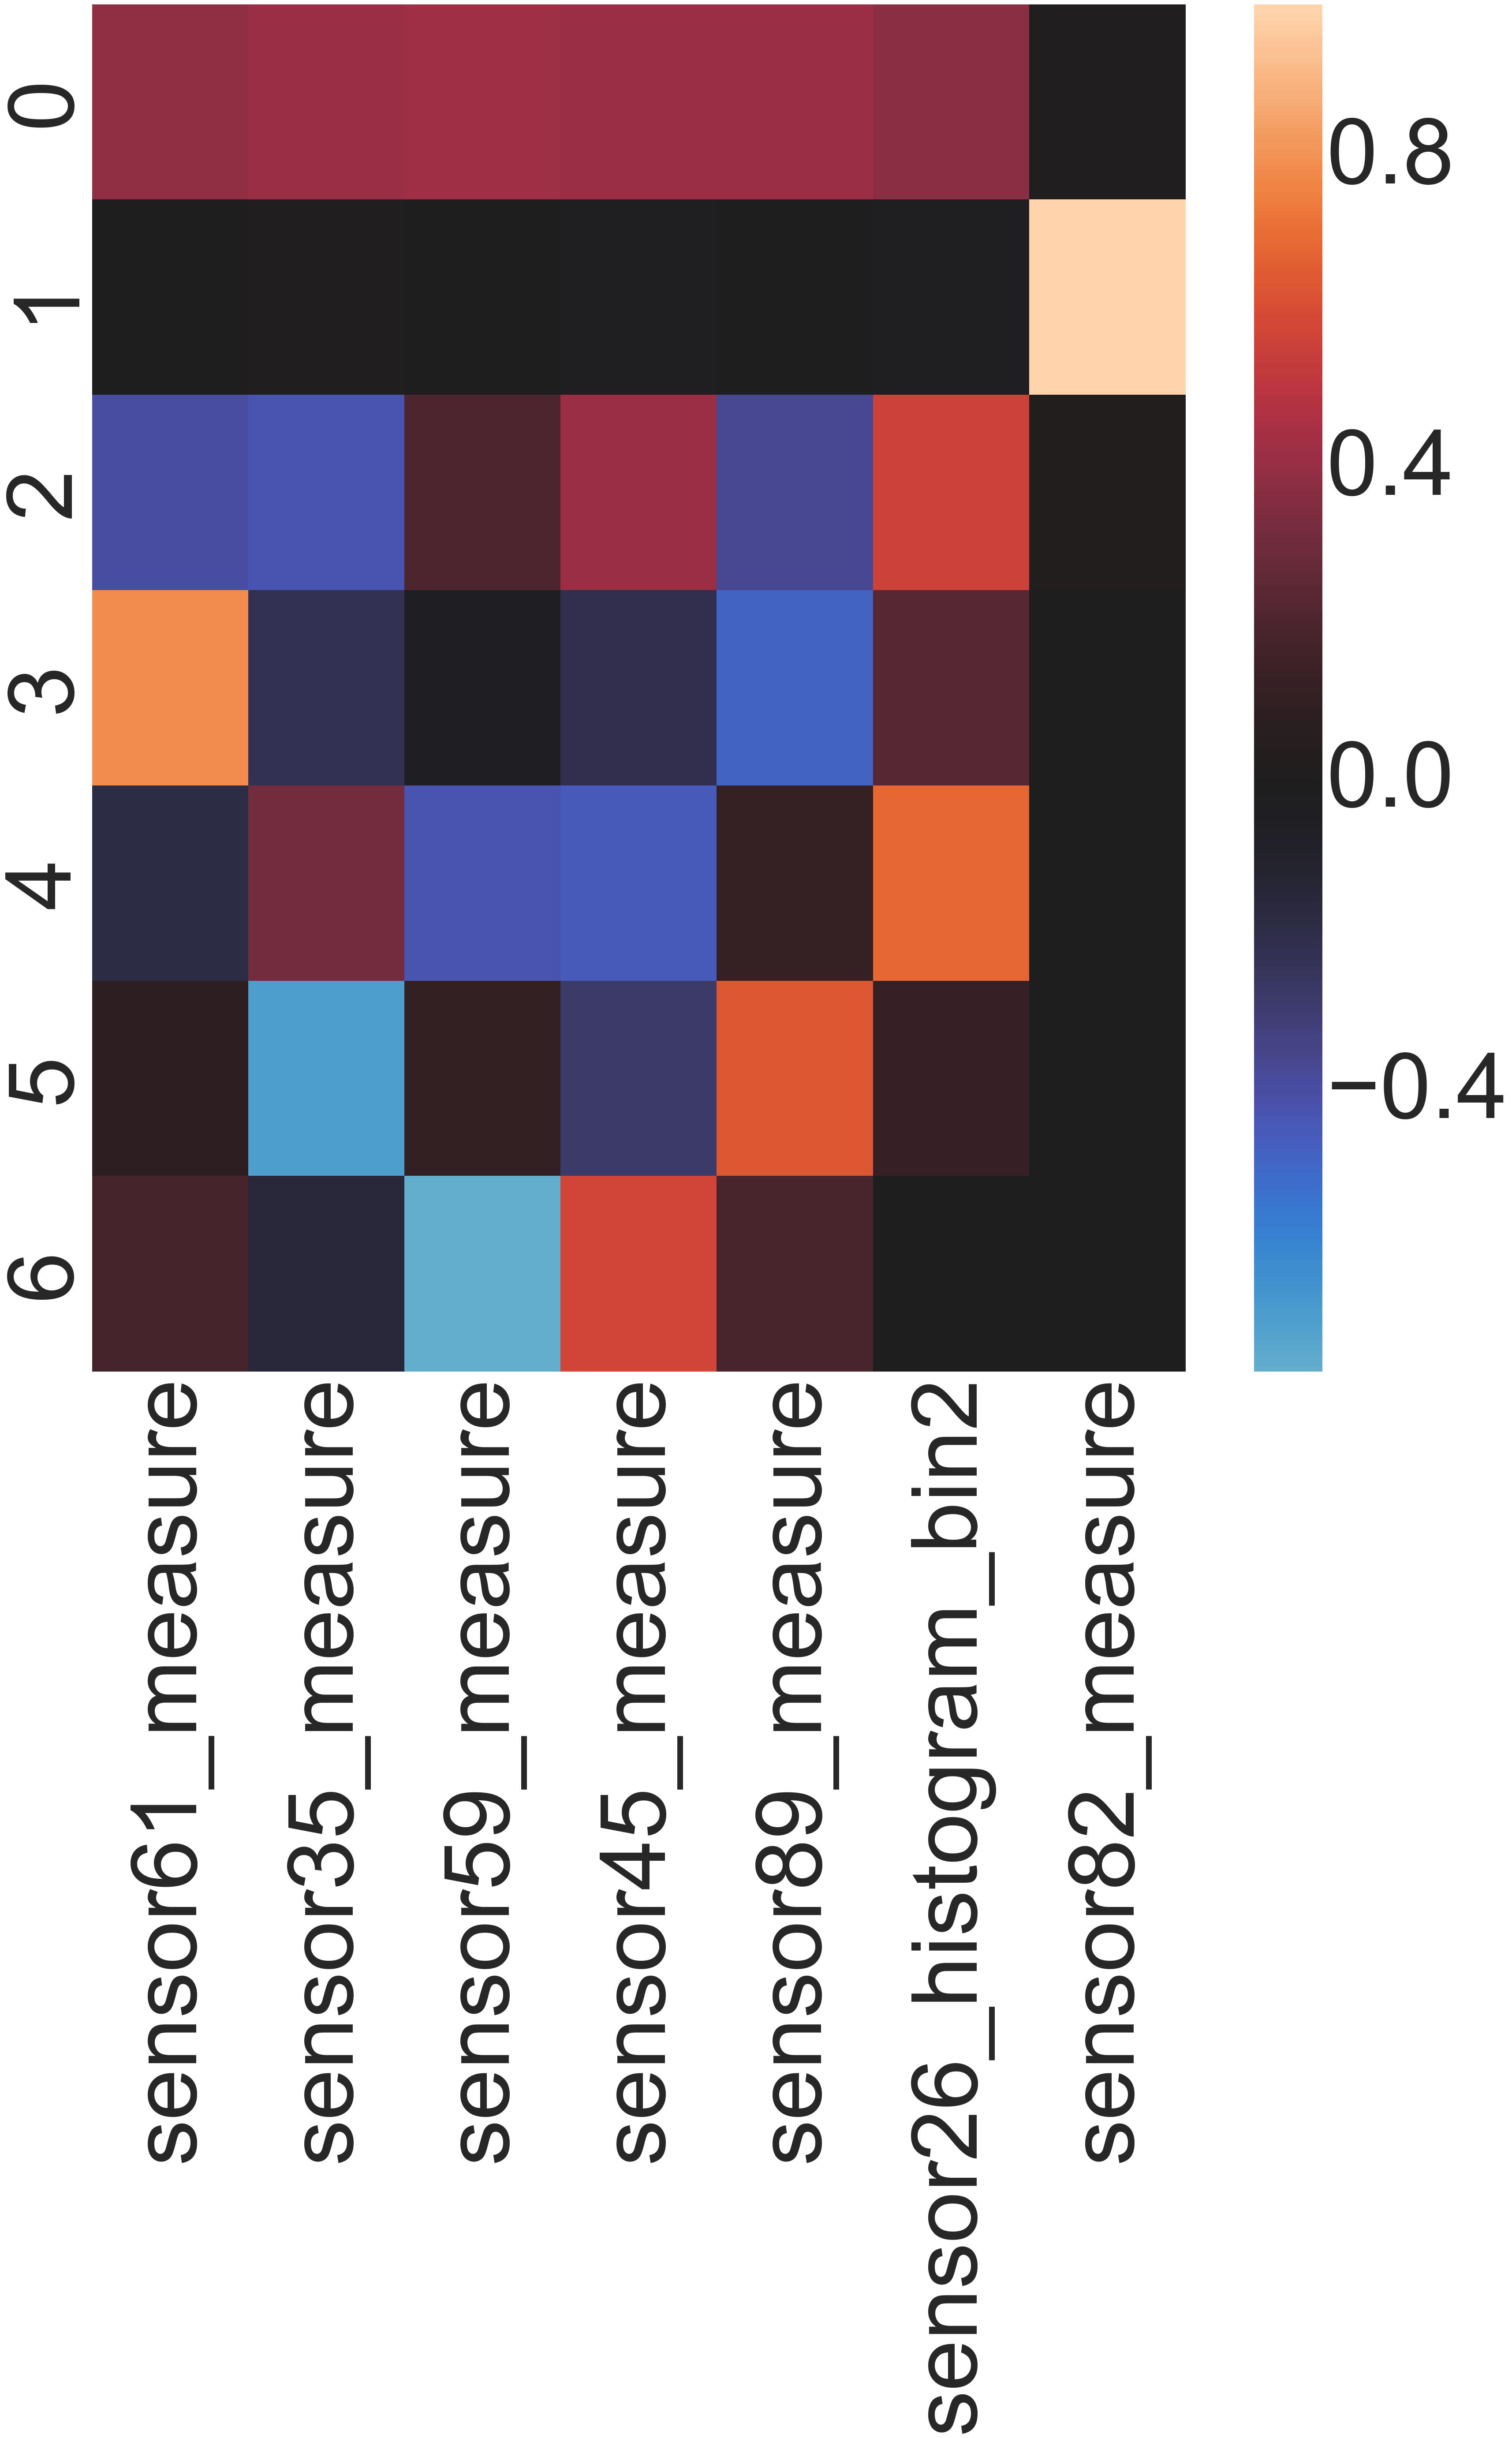

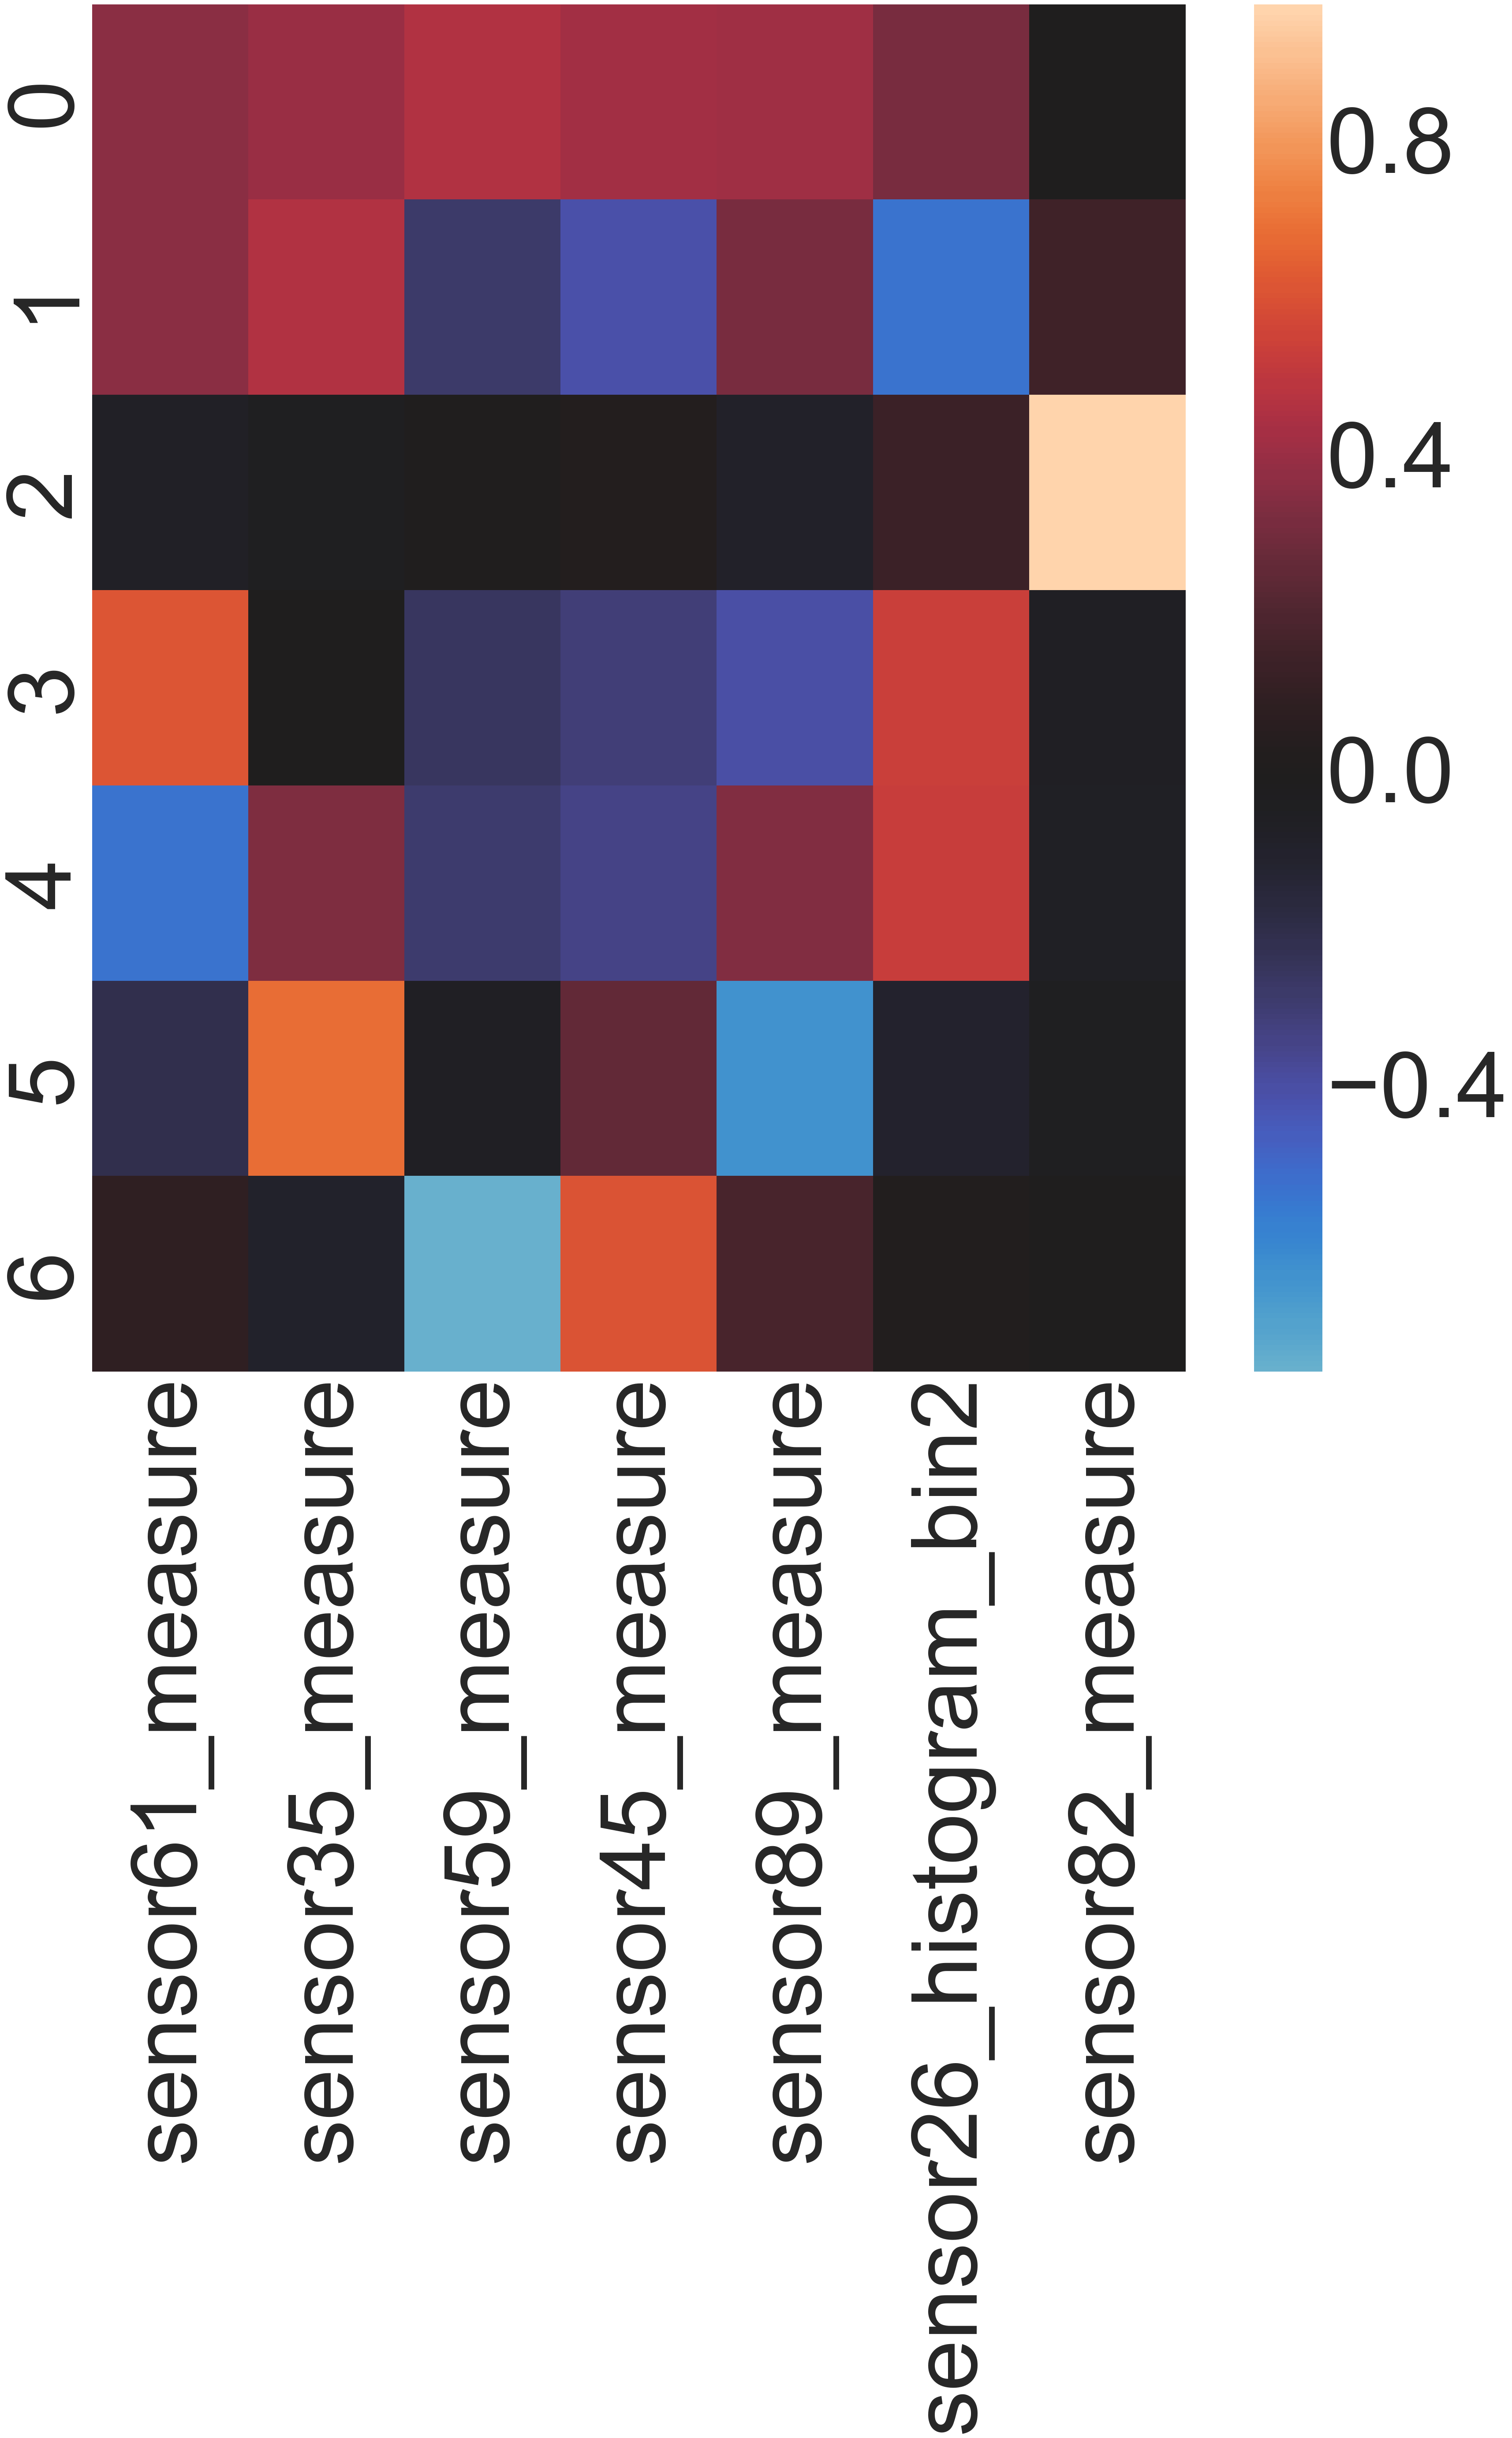

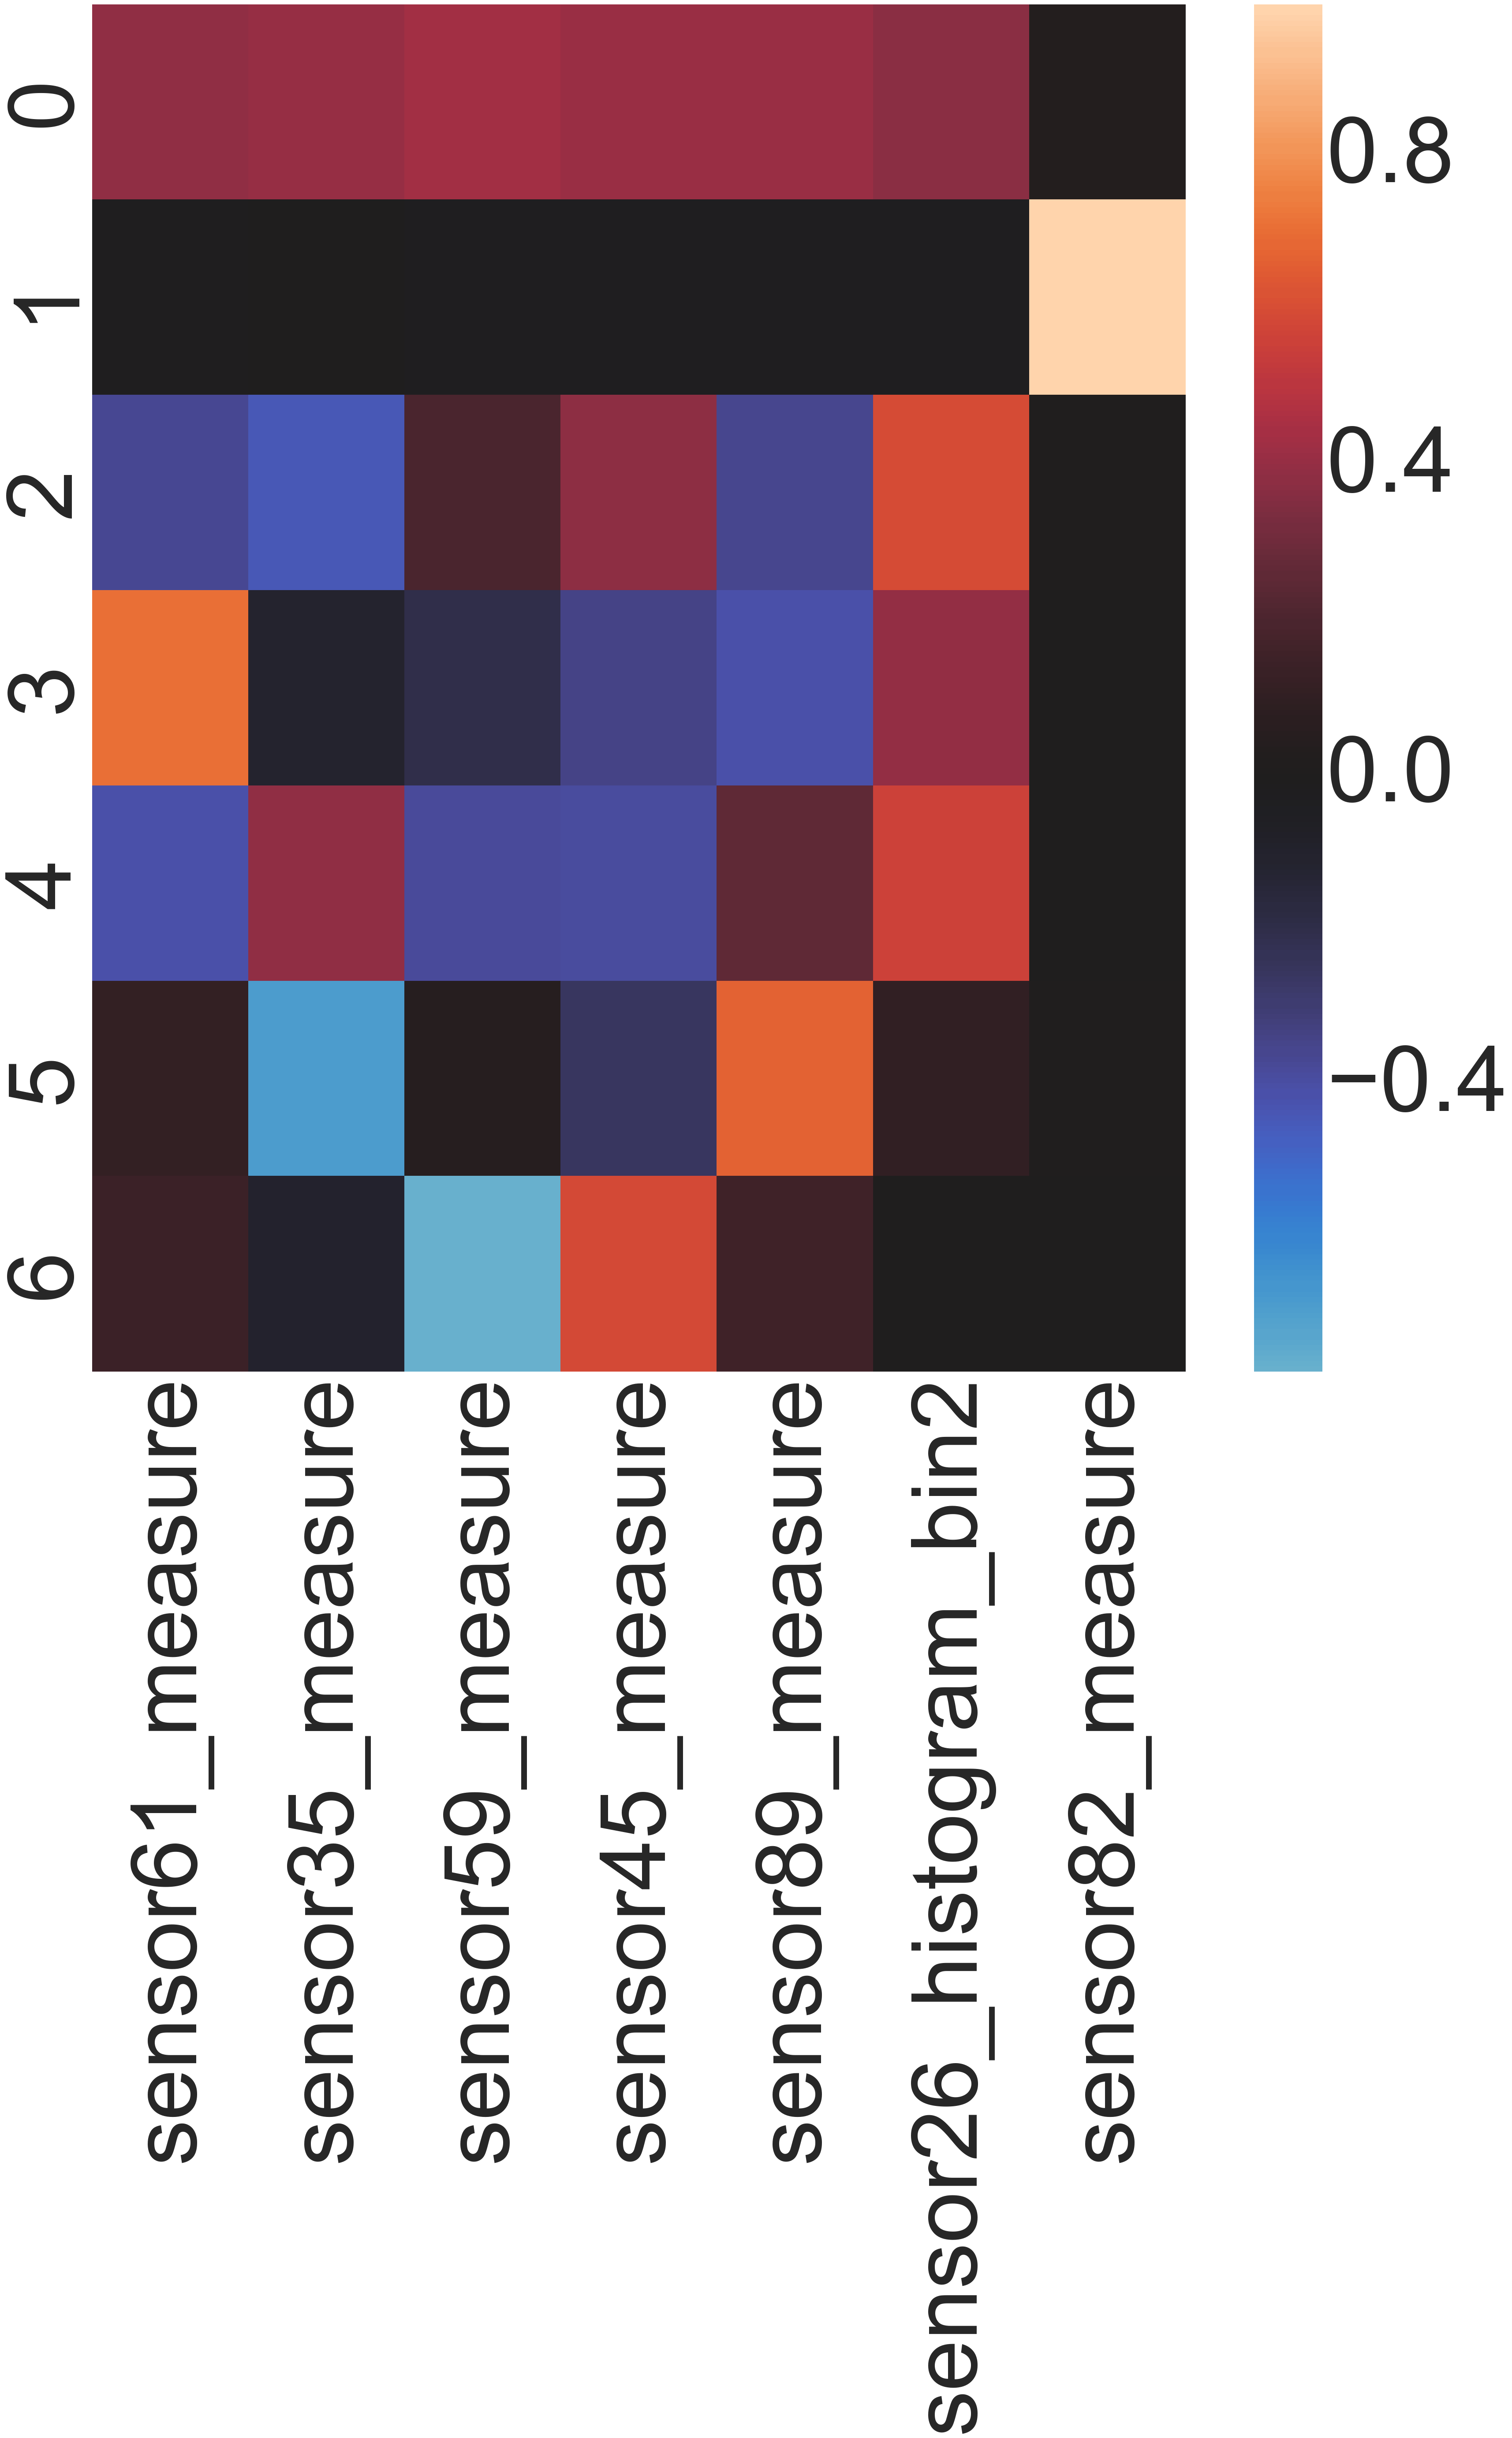

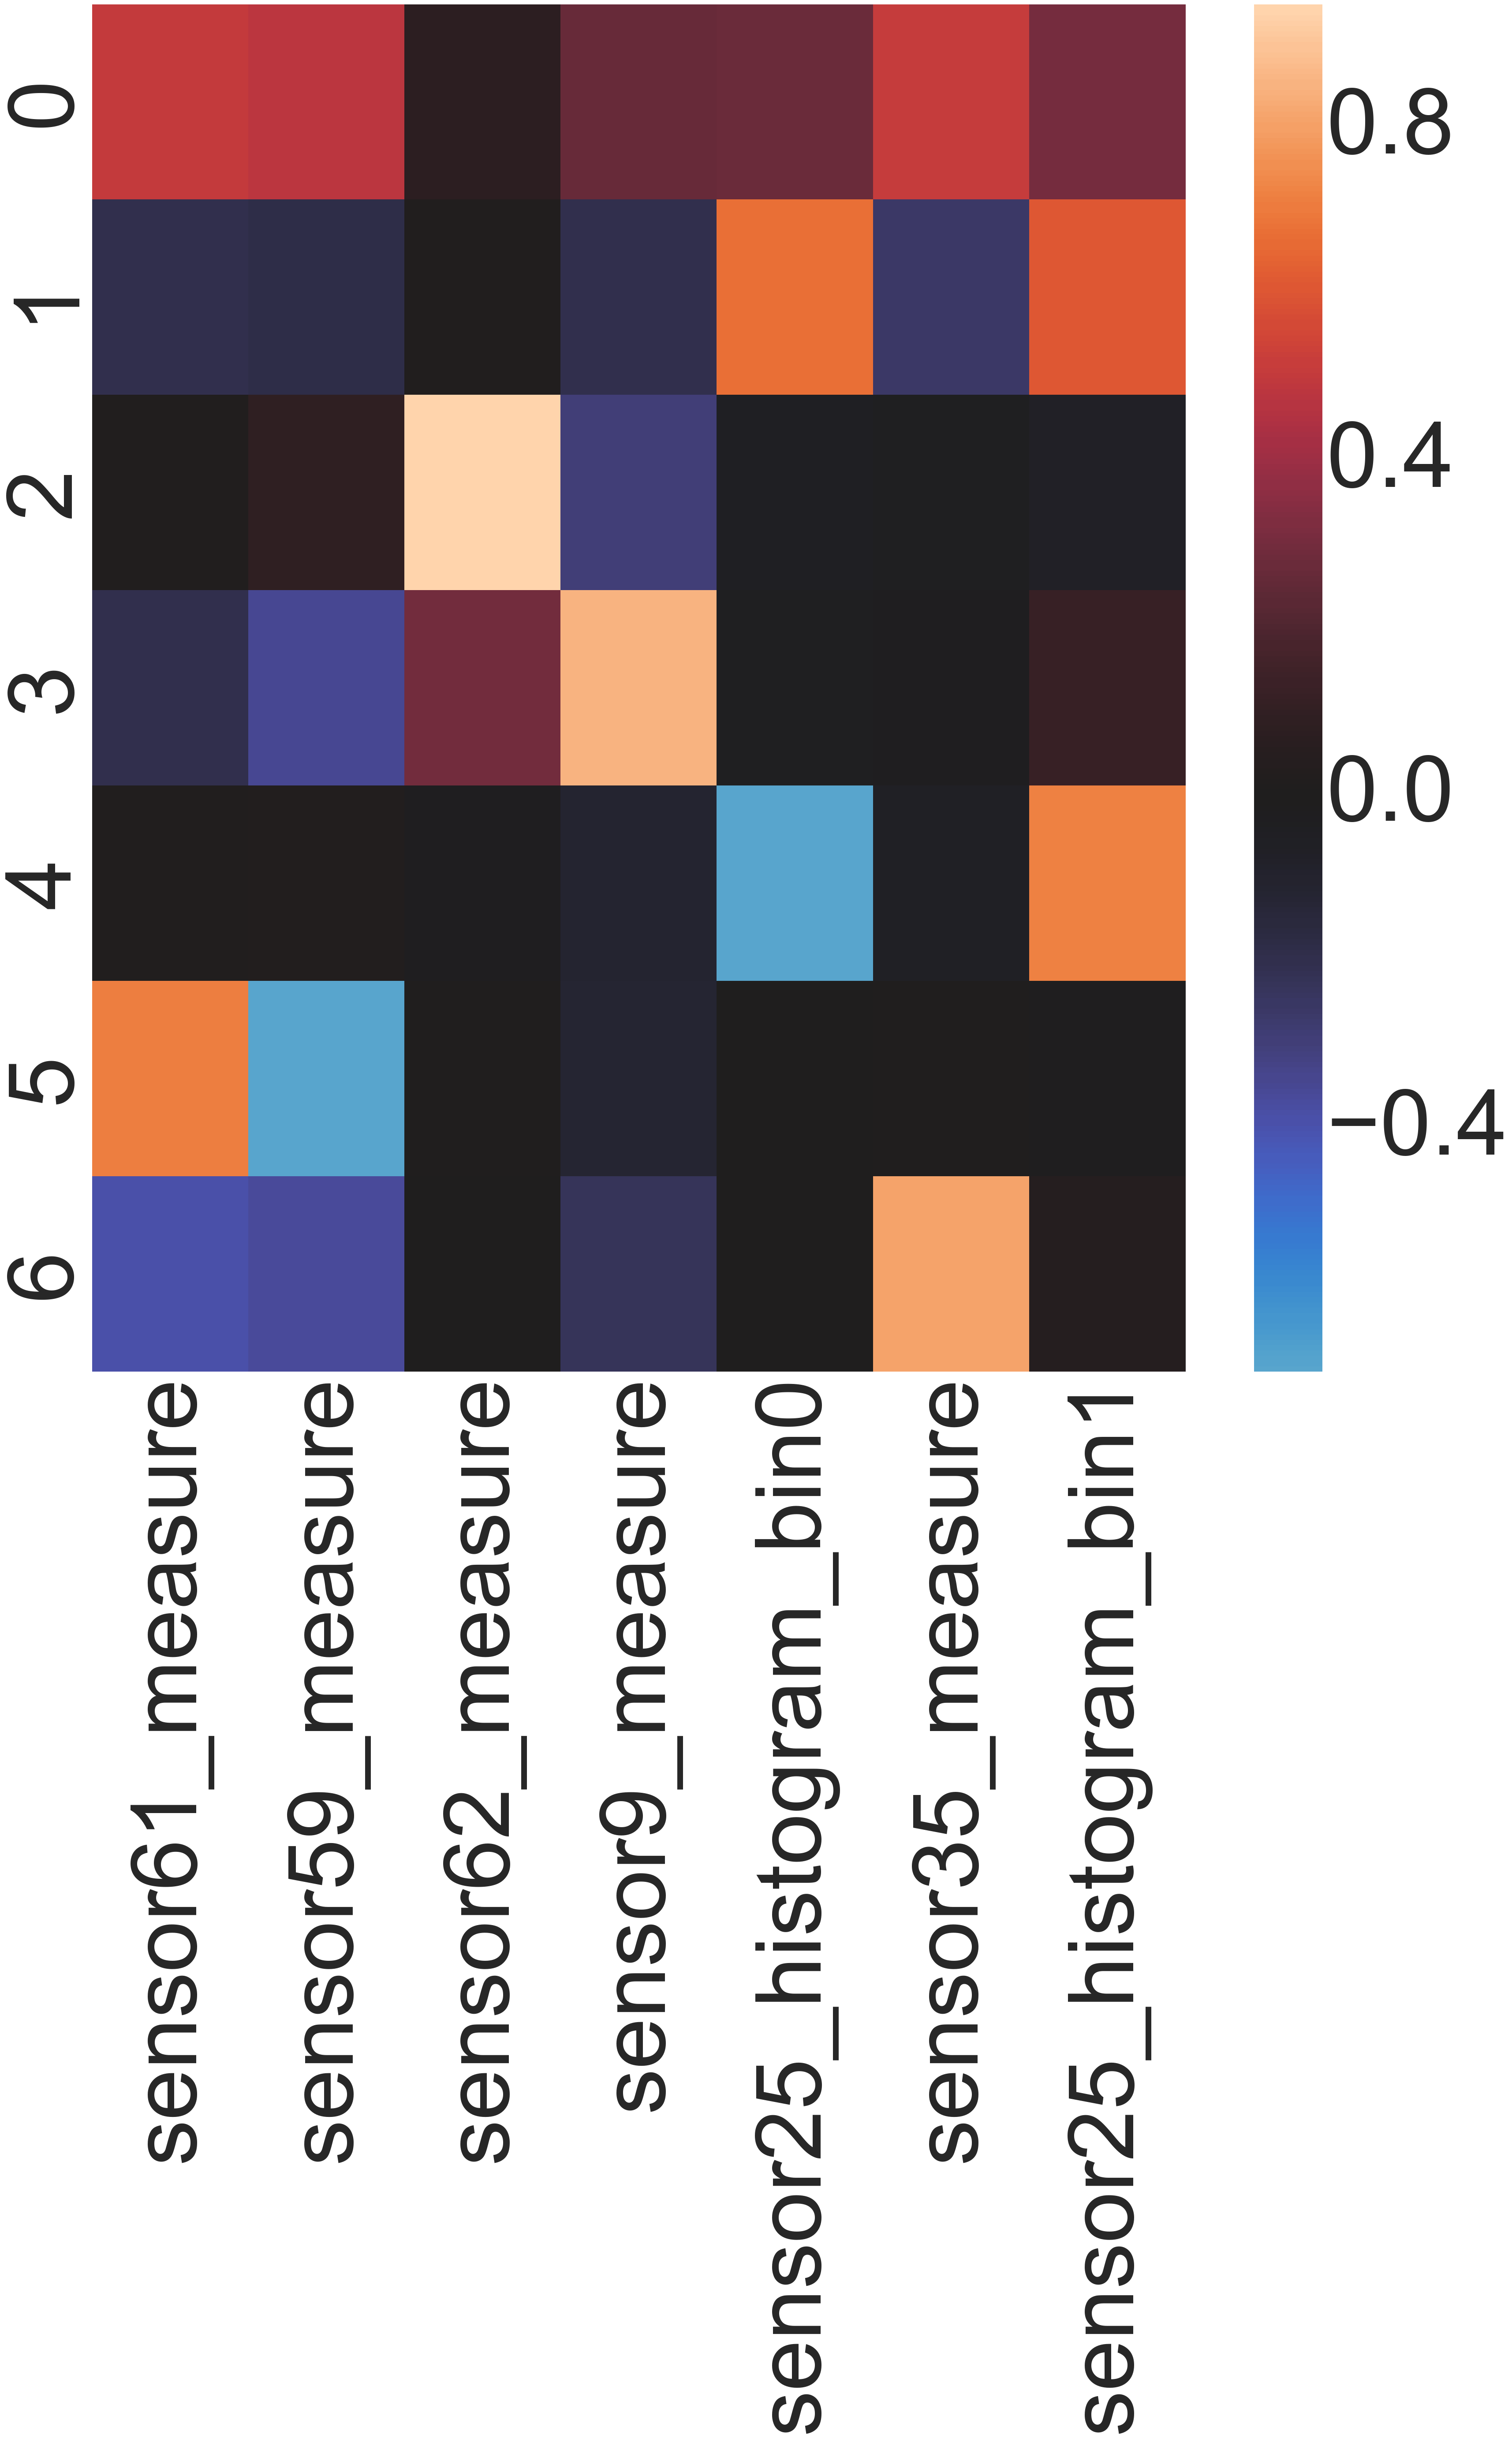

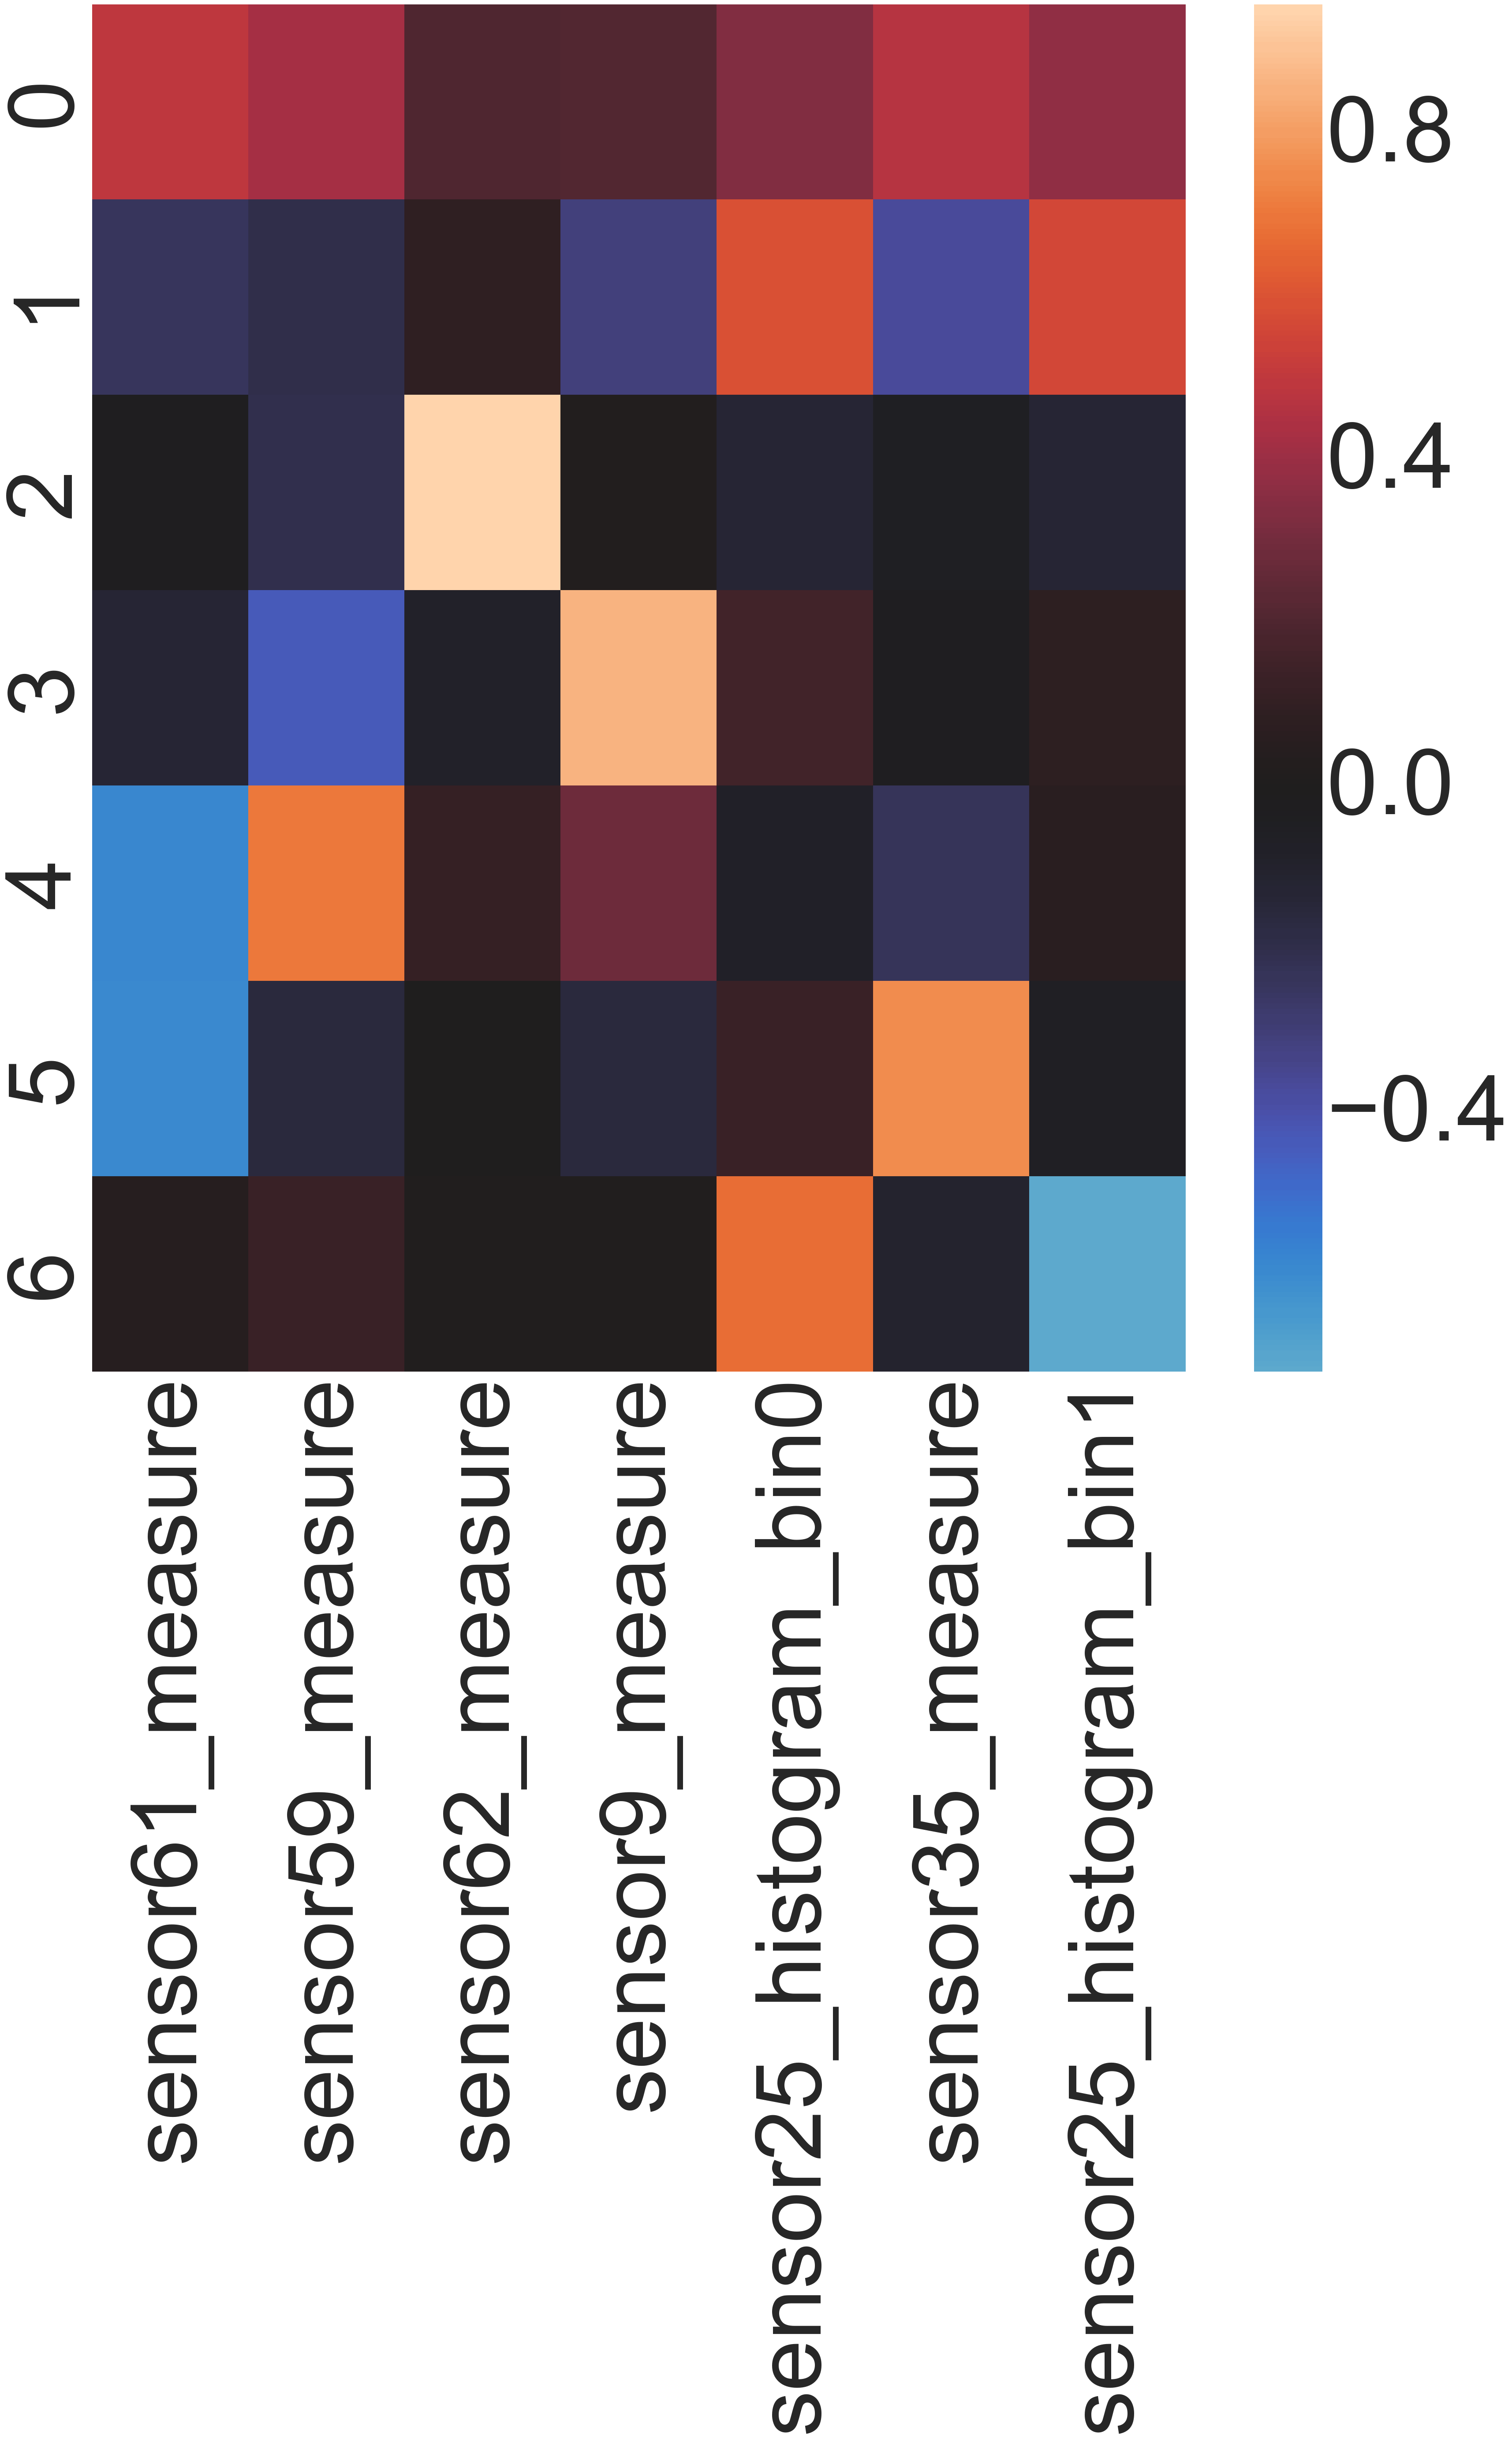

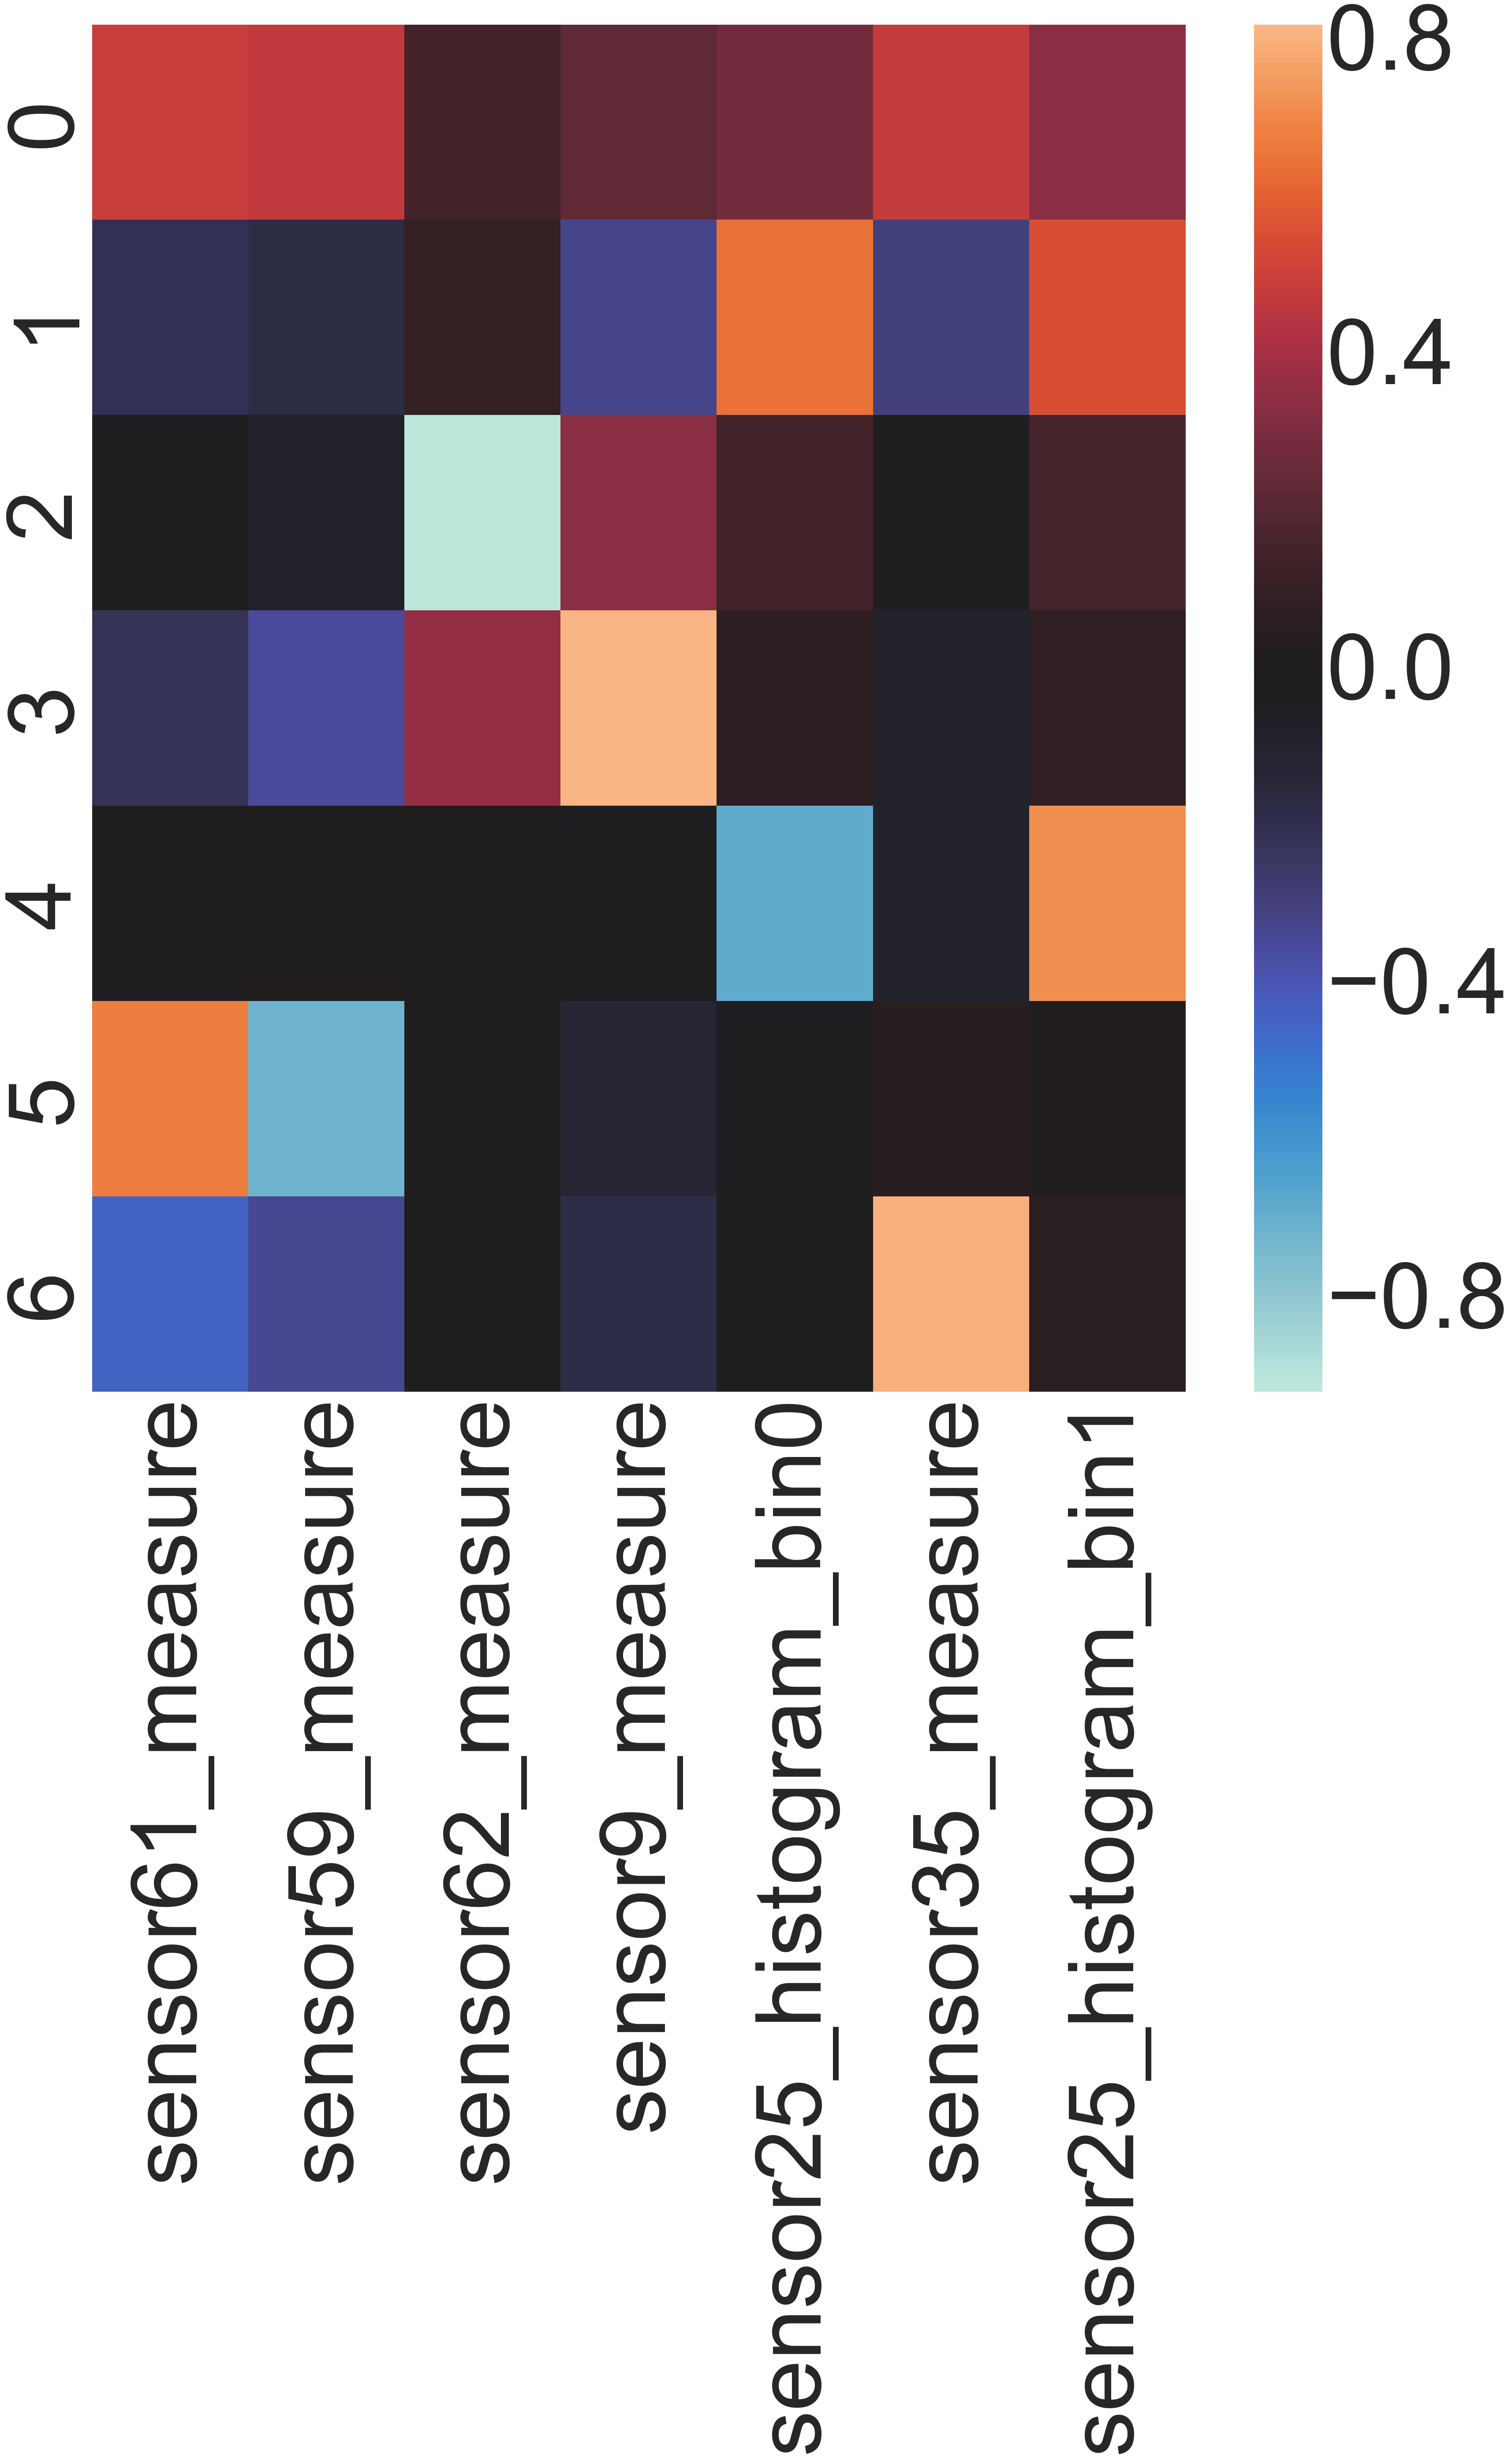

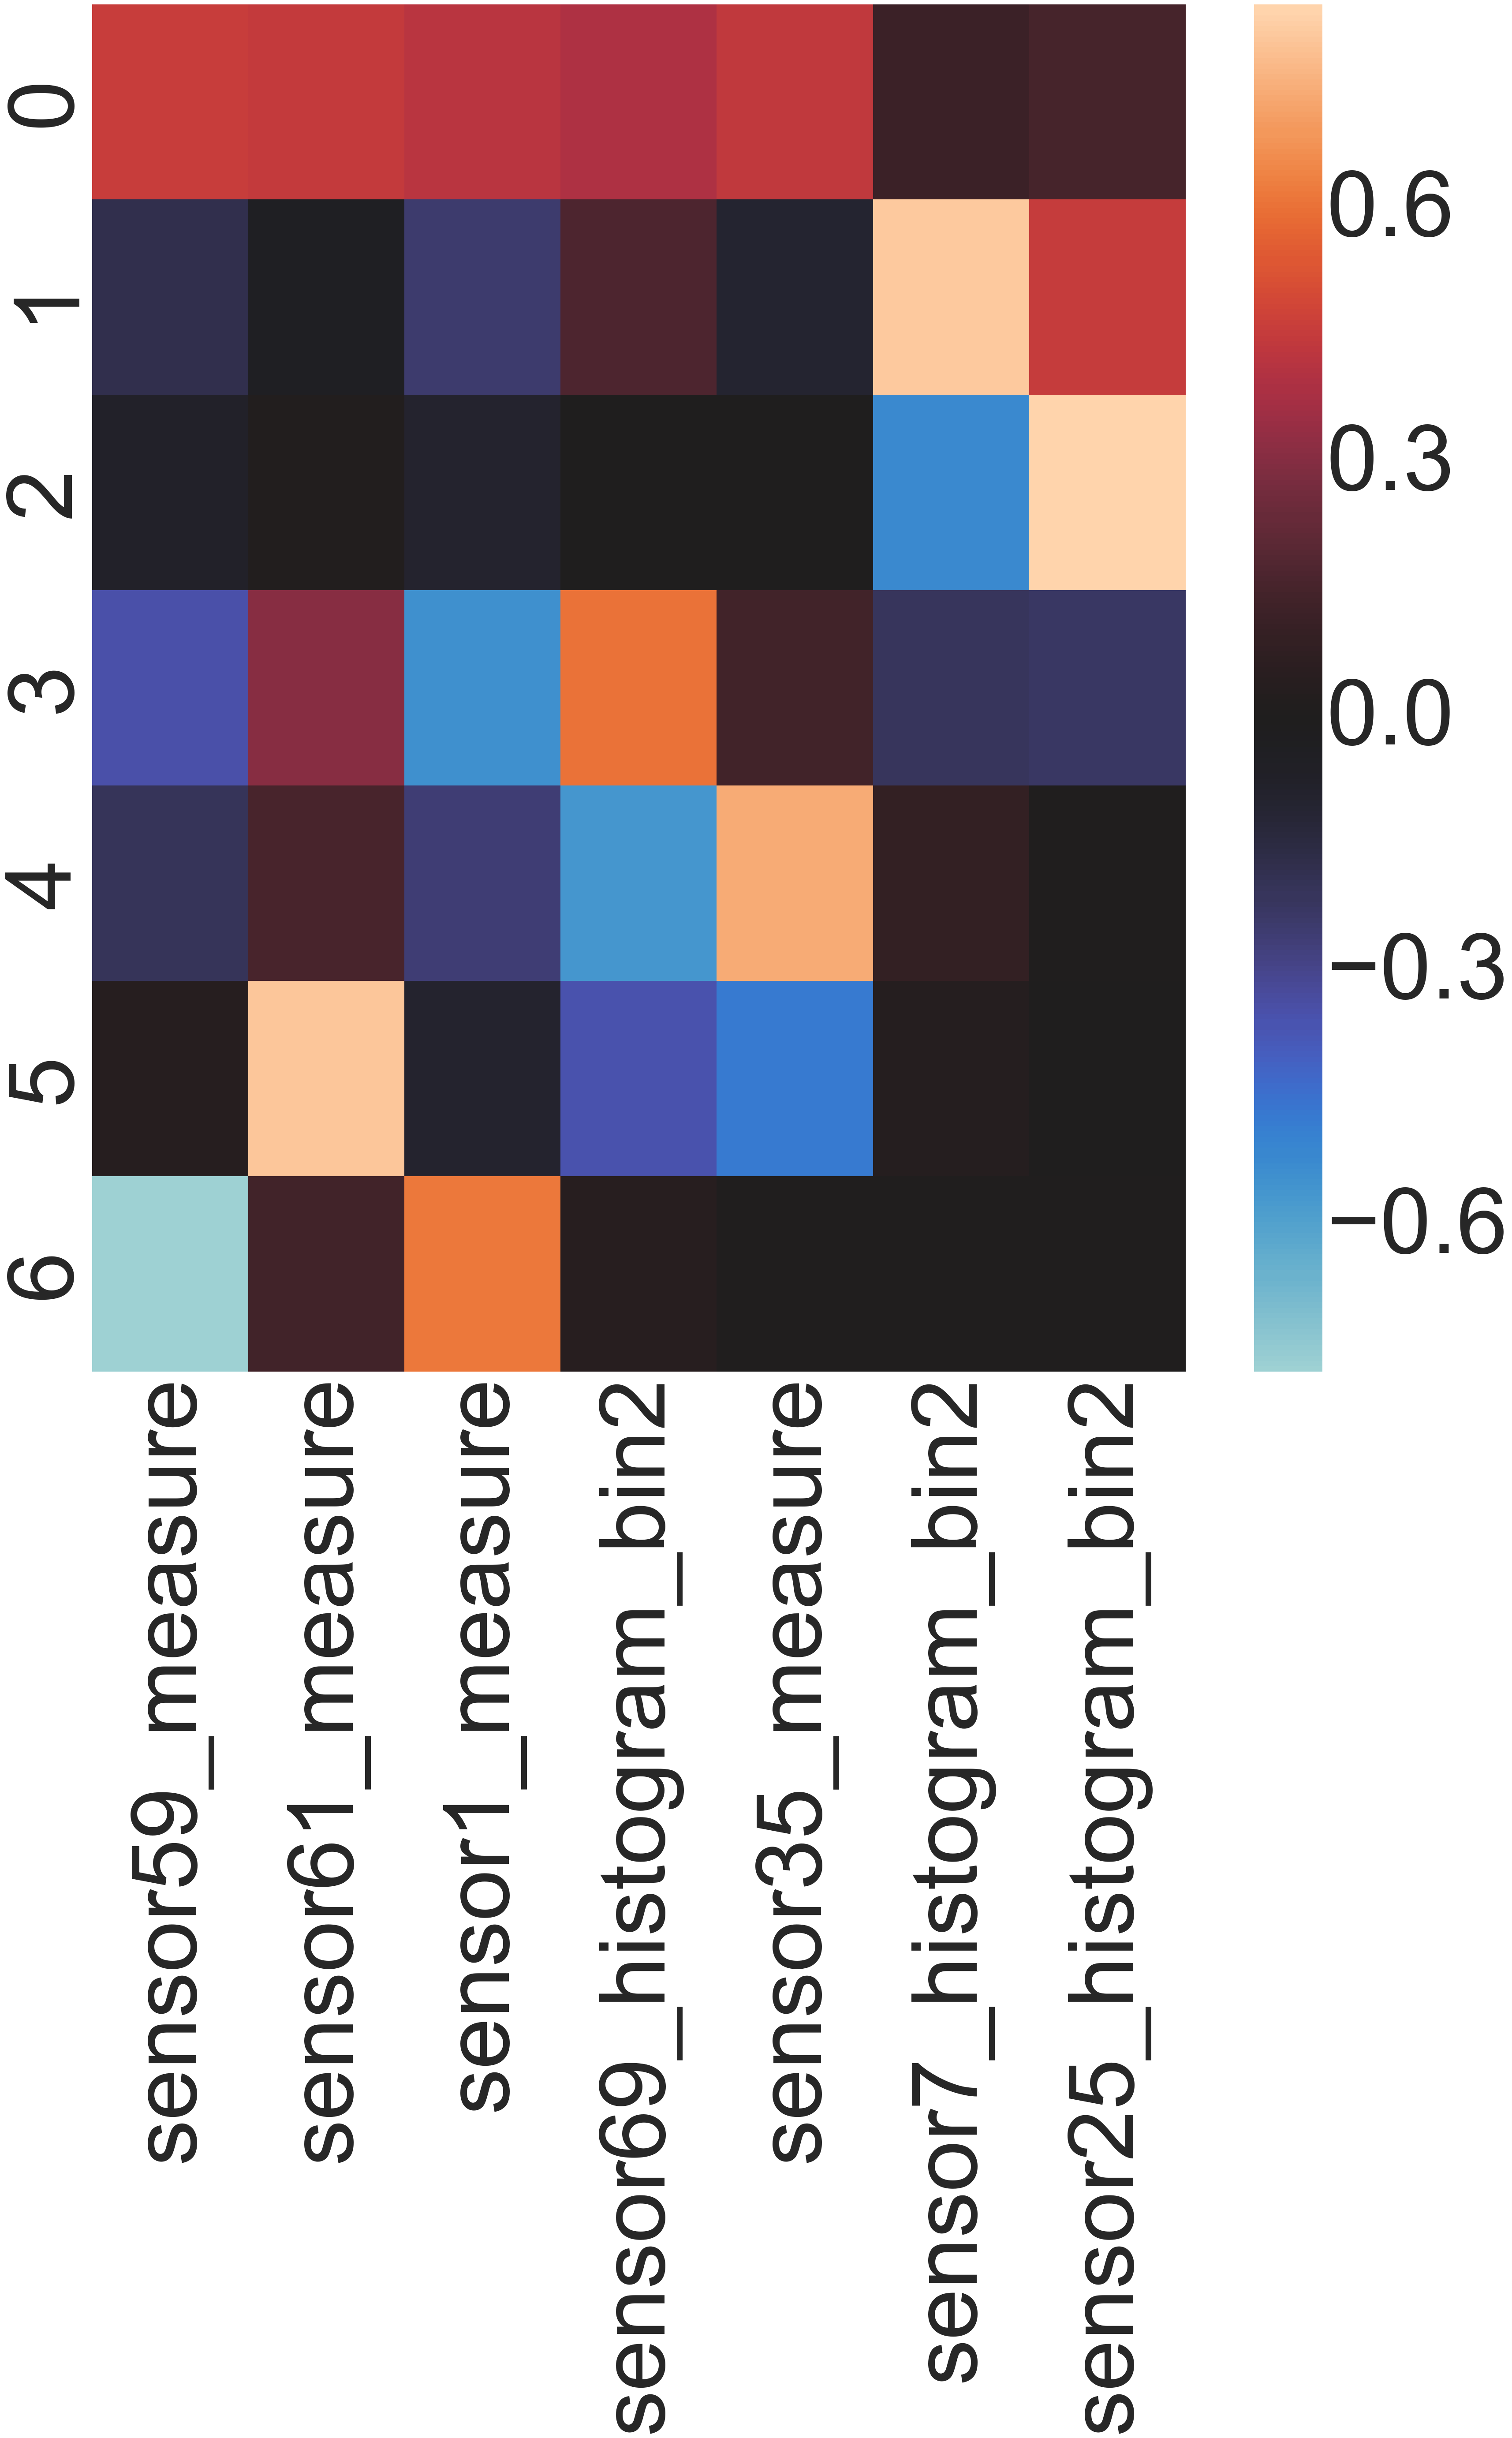

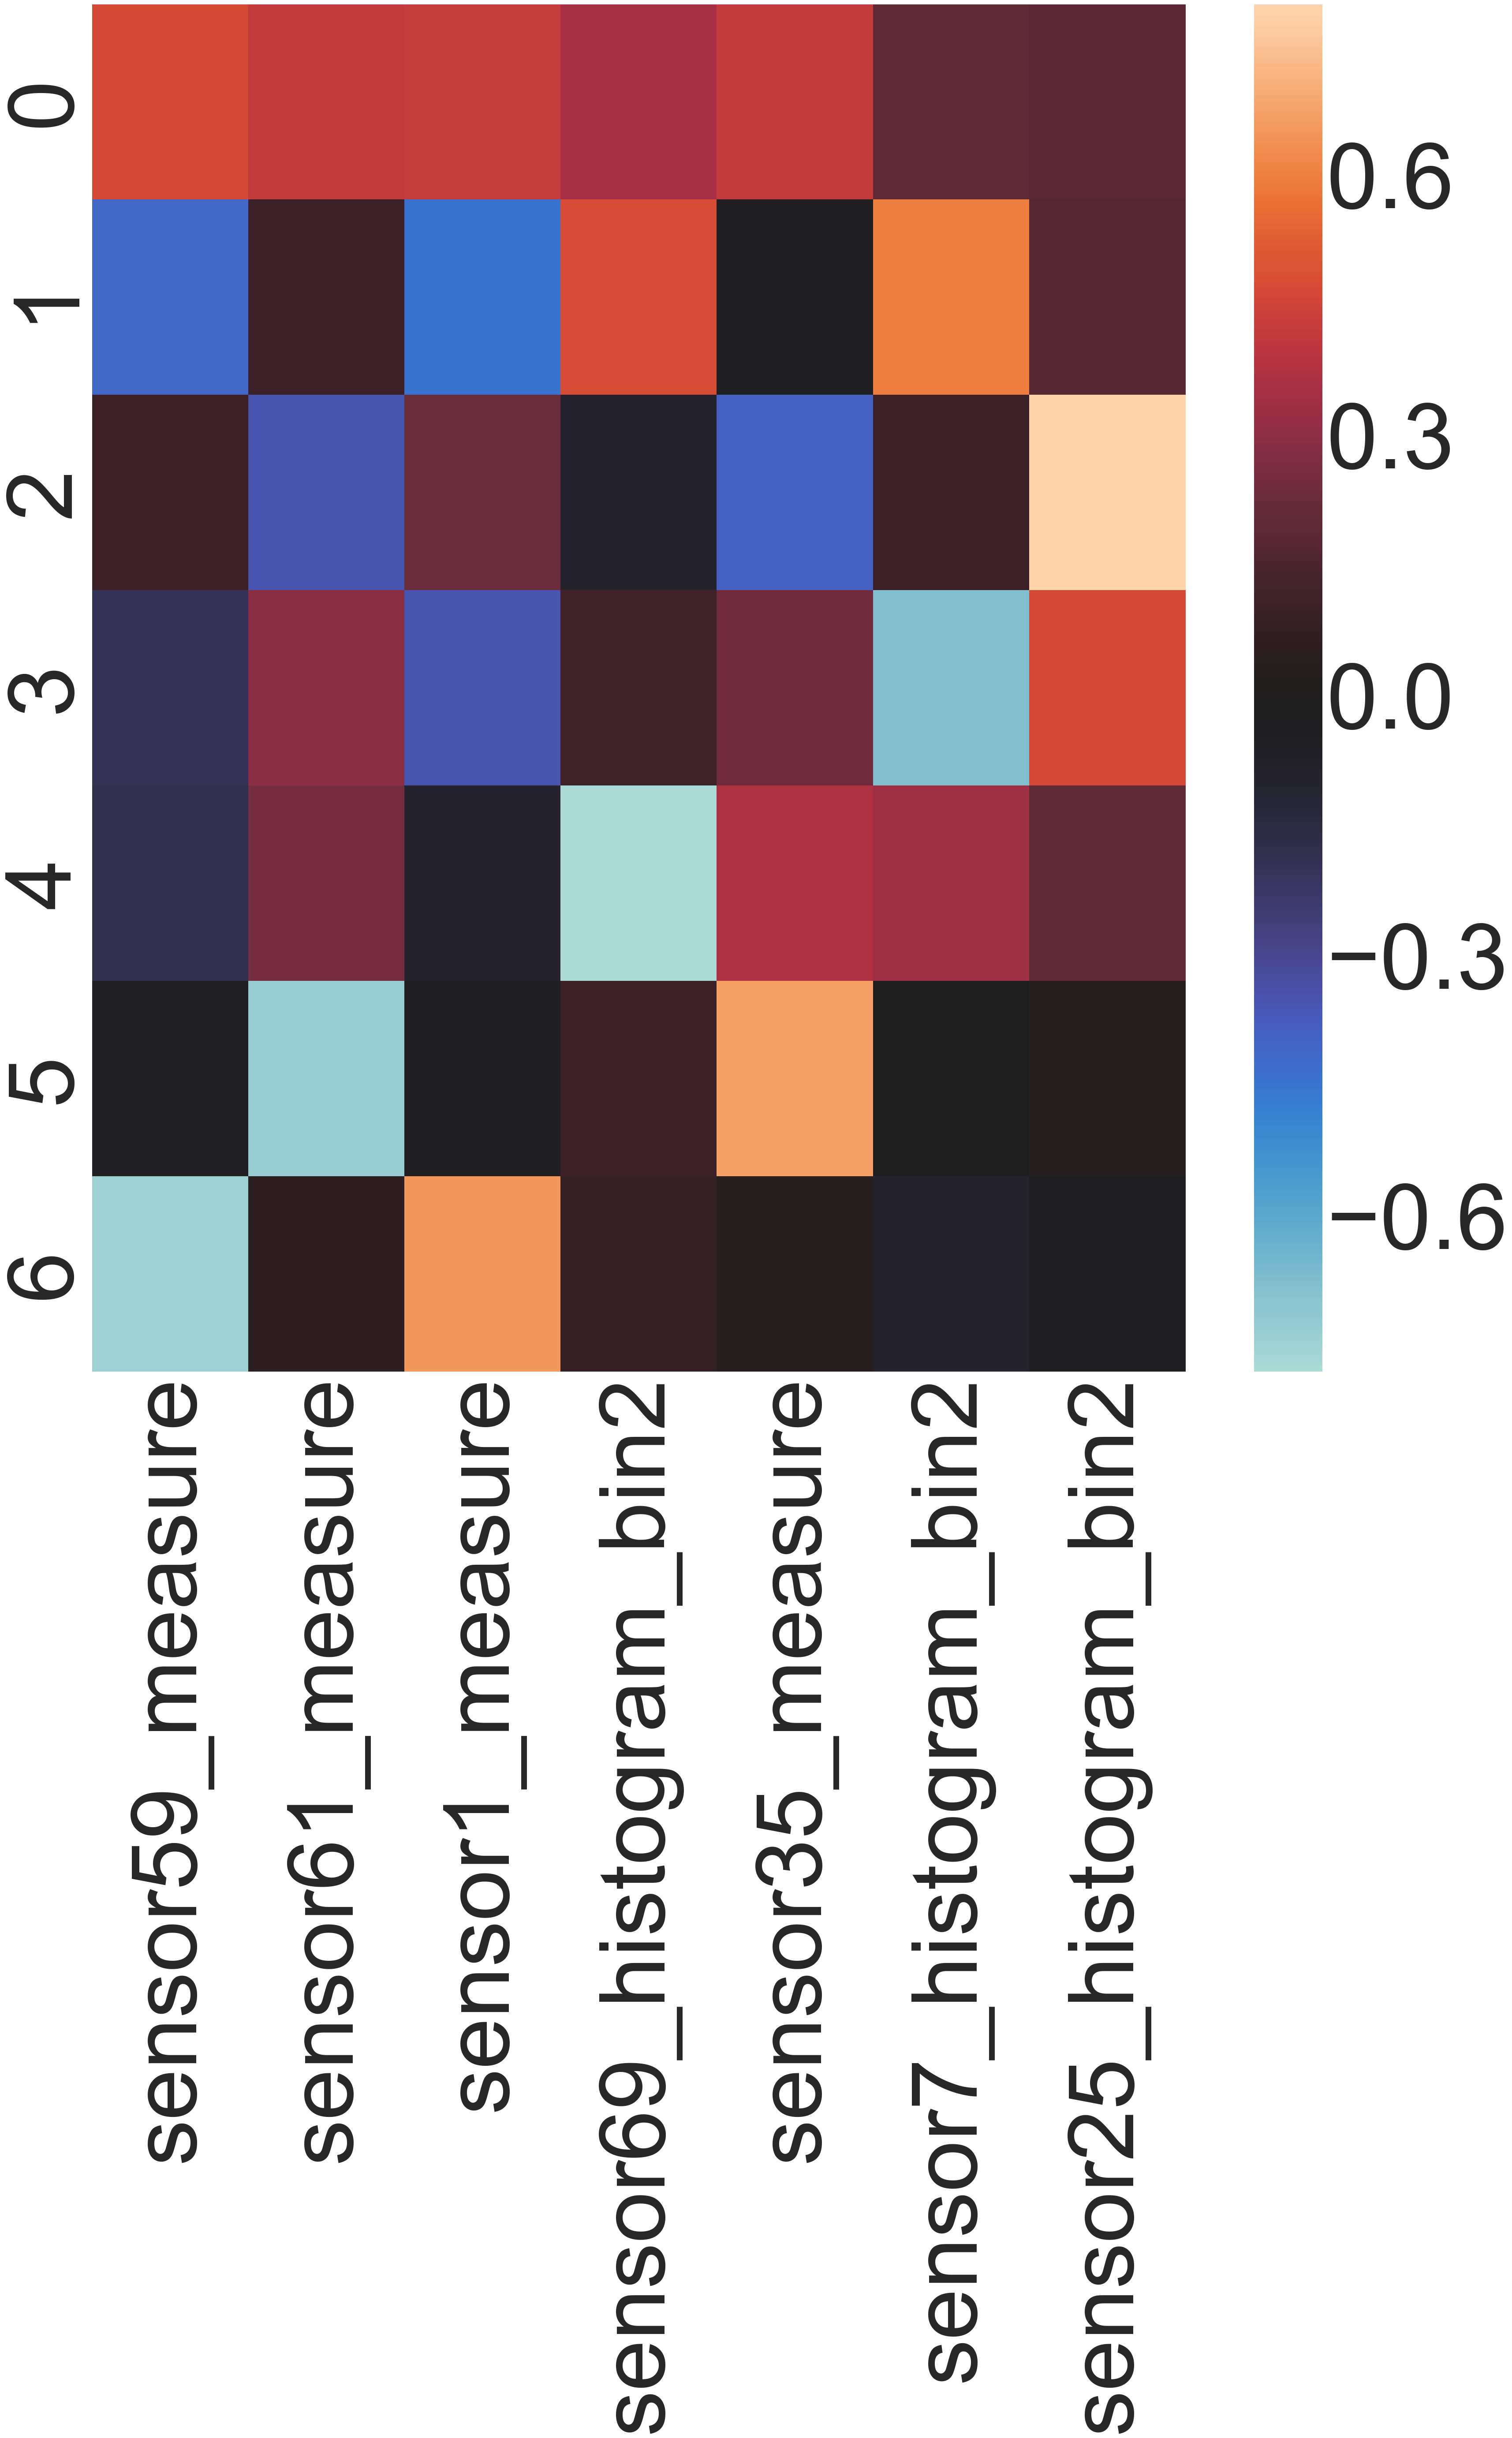

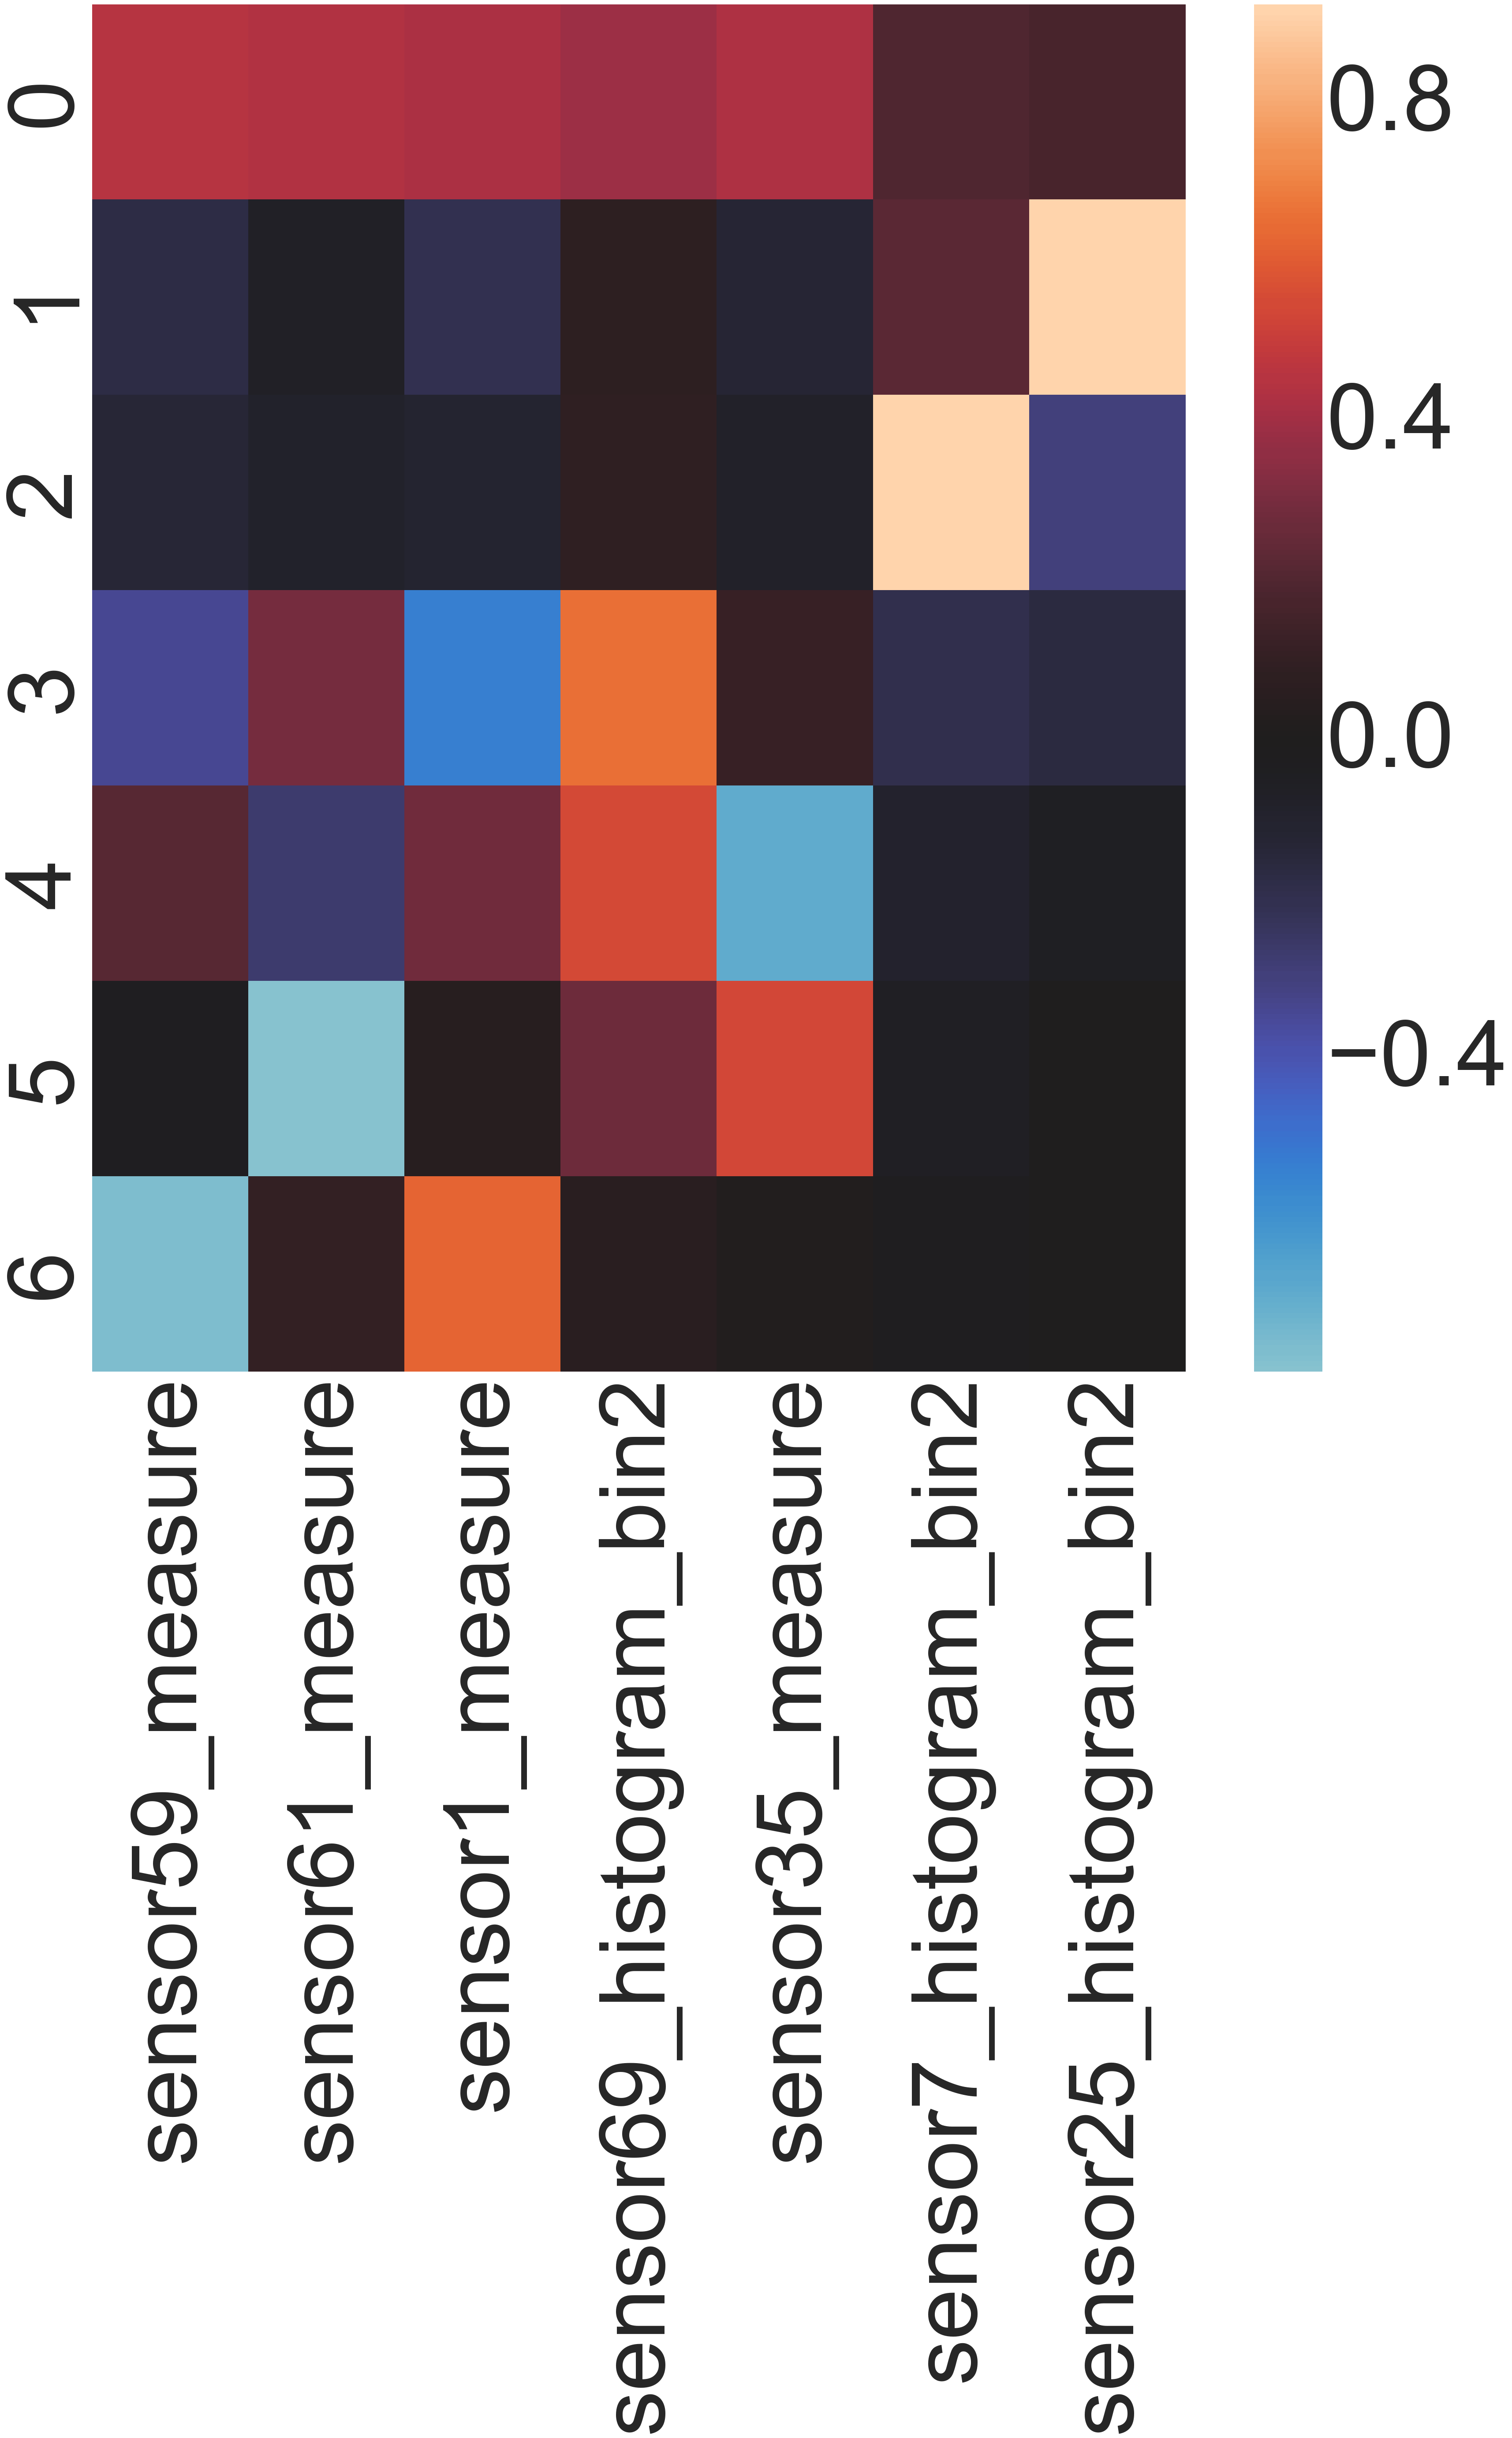

In [18]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

descr = [df_train0, df_train1, df_train]
var= ["successful","failing","total"] #labels for dataset 
models=["Average","Gradient Boosting", "XGBoost"] #labels for models used 
table = pd.DataFrame() #initializes table 

k=7
for j in range(0,3):
    print(models[j])
    top_features_list= top_features[j] 
    for i in range(0,3):
            imp_mean.fit(descr[i].loc[:,top_features_list[0:k]])
            imp_descriptors=pd.DataFrame(imp_mean.transform(descr[i].loc[:,top_features_list[0:k]]))

            imp_descriptors = StandardScaler().fit_transform(imp_descriptors)
            pca = decomposition.PCA()
            pca.fit(imp_descriptors)  

            evr= pca.explained_variance_ratio_

            #print("PCA Explained VR:", evr)
            #print("signular values",pca.singular_values_)


            PC = [] # empty array to store EVR's in until k number of sample 
            count = 0
            while count != k: # adds indexes from evr until k number of sample 
                PC.append(evr[count])
                count = count + 1
            print(var[i])
            table[var[i]]=PC

            np.seterr(divide = 'ignore', invalid = 'ignore')
            sns.set(font_scale=15)
            plt.figure(figsize = (40,40))

            pca = PCA(n_components=len(PC))

            pca.fit(imp_descriptors)
            comps = pd.DataFrame(pca.components_, columns = top_features_list[0:k])
                # Graph
              #print(comps)

            heatmap = sns.heatmap(comps.loc[:,top_features_list[0:k]], center = 0, xticklabels = 1)
    display(table) #Explained Variance table for each Estimater 
    display(comps) #variance for each feature for each pca component 
